In [6]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as st
import quandl
from quandl_apitoken import api_key

In [7]:
try:
    copper_download = quandl.get("CHRIS/CME_HG2", authtoken=api_key)
    gold_download = quandl.get("CHRIS/CME_GC2", authtoken=api_key)
    SP500_download = quandl.get("CHRIS/CME_ES2", authtoken=api_key)
    
    copper_download.to_csv("copper_2nd.csv")
    gold_download.to_csv("gold_2nd.csv")
    SP500_download.to_csv("SP500_2nd.csv")
    

except Exception as e:
    print(e)

In [8]:
csv_file = os.path.join("copper_2nd.csv")
copper_raw_df = pd.read_csv(csv_file)
copper_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1959-10-29,0.3240,0.3240,0.3190,0.3240,NaN,0.3240,79.0,582.0
1,1959-10-30,0.3215,0.3278,0.3210,0.3215,NaN,0.3215,100.0,592.0
2,1959-11-02,0.3230,0.3230,0.3180,0.3230,NaN,0.3230,88.0,587.0
3,1959-11-04,0.3300,0.3307,0.3259,0.3300,NaN,0.3300,135.0,577.0
4,1959-11-05,0.3310,0.3340,0.3310,0.3310,NaN,0.3310,161.0,617.0


In [9]:
SP500 = 'SP500_2nd.csv'
SP500_df= pd.read_csv(SP500)
SP500_df.tail()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
5790,2020-06-10,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,151588.0
5791,2020-06-11,3173.00,3177.75,2985.25,3003.0,176.00,2999.50,802407.0,193508.0
5792,2020-06-12,3000.75,3076.75,2971.00,3024.5,24.25,3023.75,2715442.0,414547.0
5793,2020-06-15,2983.25,3068.25,2923.75,3065.5,38.25,3062.00,2958270.0,906306.0
5794,2020-06-16,3065.25,3156.25,3060.25,3116.0,56.25,3118.25,2979960.0,1678383.0


In [10]:
SP500_df = SP500_df.sort_index(axis=0, ascending=True)
SP500_df.head()


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1997-09-09,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0
1,1997-09-10,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
2,1997-09-11,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
3,1997-09-12,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
4,1997-09-15,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0


In [11]:
sp500_percent_return = []
previous_price = 943.5
for index , row in SP500_df.iterrows():
    Settle_row = row["Settle"]
    dailySP500_return = (Settle_row - previous_price) / previous_price *100
    sp500_percent_return.append(round(dailySP500_return, 2))
    previous_price = Settle_row
SP500_df.insert(1,"SP_Daily_Pct_Return", sp500_percent_return)



In [12]:
SP500_df["Date"] = pd.to_datetime(SP500_df["Date"])

In [13]:
SP_dates = SP500_df.loc[(SP500_df["Date"] >= "1996-12-31") & 
                                   (SP500_df["Date"] <= "2020-06-10")]
SP_dates.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0


In [14]:
SP_dates['SP_MA'] = SP_dates.rolling(55).mean()['SP_Daily_Pct_Return']
SP_dates.tail()

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SP_MA
5786,2020-06-04,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,57382.0,0.435818
5787,2020-06-05,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,66325.0,0.542364
5788,2020-06-08,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,75367.0,0.574909
5789,2020-06-09,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,127169.0,0.638909
5790,2020-06-10,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,151588.0,0.688000


In [15]:
copper = 'copper_2nd.csv'
copper_df = pd.read_csv(copper)
print(copper_df.shape)


(9989, 9)


In [16]:
gold = 'gold_2nd.csv'
gold_df = pd.read_csv(gold)
print(copper_df.shape)


(9989, 9)


In [17]:
copp_gold_df = pd.merge(gold_df, copper_df, on=["Date"])
copp_gold_df.head()


,Date,Open_x,High_x,Low_x,Last_x,Change_x,Settle_x,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
0,1975-09-26,136.1,139.3,136.1,139.0,NaN,139.0,972.0,4713.0,0.573,0.581,0.573,0.580,NaN,0.580,51.0,2174.0
1,1975-09-29,138.2,141.3,138.2,139.8,NaN,139.8,1012.0,4626.0,0.578,0.578,0.575,0.575,NaN,0.575,78.0,2179.0
2,1975-09-30,141.5,143.9,141.5,142.2,NaN,142.2,947.0,4556.0,0.572,0.579,0.571,0.571,NaN,0.571,35.0,2169.0
3,1975-10-01,145.0,145.8,143.6,144.2,NaN,144.2,1153.0,4510.0,0.575,0.575,0.571,0.572,NaN,0.572,99.0,2151.0
4,1975-10-02,145.0,146.2,142.5,143.4,NaN,143.4,1159.0,4254.0,0.570,0.570,0.567,0.568,NaN,0.568,20.0,2144.0


In [18]:
copp_gold_df = pd.DataFrame({
    "Date": copp_gold_df["Date"],
    "Gold Price": copp_gold_df["Settle_x"],
    "Copper Price": copp_gold_df["Settle_y"]
})
copp_gold_df

,Date,Gold Price,Copper Price
0,1975-09-26,139.0,0.5800
1,1975-09-29,139.8,0.5750
2,1975-09-30,142.2,0.5710
3,1975-10-01,144.2,0.5720
4,1975-10-02,143.4,0.5680
...,...,...,...
8682,2020-06-10,1720.7,2.6565
8683,2020-06-11,1739.8,2.5865
8684,2020-06-12,1737.3,2.6000
8685,2020-06-15,1727.2,2.5670


In [19]:
copp_gold_df_corr = st.pearsonr(copp_gold_df["Gold Price"],copp_gold_df["Copper Price"])[0]
print(copp_gold_df_corr)

0.865046879892616


In [20]:
gold_copp_ratio = (copp_gold_df["Copper Price"] / copp_gold_df["Gold Price"])

In [21]:
copp_gold_df.insert(3,"GoldCopperRatio", gold_copp_ratio)
copp_gold_df.tail()                                       


,Date,Gold Price,Copper Price,GoldCopperRatio
8682,2020-06-10,1720.7,2.6565,0.001544
8683,2020-06-11,1739.8,2.5865,0.001487
8684,2020-06-12,1737.3,2.6000,0.001497
8685,2020-06-15,1727.2,2.5670,0.001486
8686,2020-06-16,1736.5,2.5645,0.001477


In [22]:
copp_gold_df = copp_gold_df.sort_index(axis=0, ascending=True)
copp_gold_df.head()


,Date,Gold Price,Copper Price,GoldCopperRatio
0,1975-09-26,139.0,0.580,0.004173
1,1975-09-29,139.8,0.575,0.004113
2,1975-09-30,142.2,0.571,0.004015
3,1975-10-01,144.2,0.572,0.003967
4,1975-10-02,143.4,0.568,0.003961


In [23]:
copp_gold_percent_chg = []
previous_price = .002849
for index , row in copp_gold_df.iterrows():
    GcR_row = row["GoldCopperRatio"]
    GcR_daily_pctchg = (GcR_row - previous_price) / previous_price *100
    copp_gold_percent_chg.append(round(GcR_daily_pctchg, 2))
    previous_price = GcR_row
copp_gold_df.insert(1,"Gold-Copp Dly Ret", copp_gold_percent_chg)
copp_gold_df.tail()



,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
8682,2020-06-10,2.28,1720.7,2.6565,0.001544
8683,2020-06-11,-3.70,1739.8,2.5865,0.001487
8684,2020-06-12,0.67,1737.3,2.6000,0.001497
8685,2020-06-15,-0.69,1727.2,2.5670,0.001486
8686,2020-06-16,-0.63,1736.5,2.5645,0.001477


In [24]:
copp_gold_df.head()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
0,1975-09-26,46.46,139.0,0.580,0.004173
1,1975-09-29,-1.43,139.8,0.575,0.004113
2,1975-09-30,-2.37,142.2,0.571,0.004015
3,1975-10-01,-1.21,144.2,0.572,0.003967
4,1975-10-02,-0.15,143.4,0.568,0.003961


In [25]:
copp_gold_df["Date"] = pd.to_datetime(copp_gold_df["Date"])

In [26]:
copp_gold_dates_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1998-04-09") & 
                                   (copp_gold_df["Date"] <= "2020-06-10")]

copp_gold_dates_df

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
3166,1998-04-09,3.88,310.2,0.8105,0.002613
3167,1998-04-13,0.48,312.9,0.8215,0.002625
3168,1998-04-14,0.51,310.0,0.8180,0.002639
3169,1998-04-15,5.05,309.0,0.8565,0.002772
3170,1998-04-16,-2.94,309.8,0.8335,0.002690
...,...,...,...,...,...
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441
8679,2020-06-05,5.36,1683.0,2.5555,0.001518
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505
8681,2020-06-09,0.32,1721.9,2.5990,0.001509


In [27]:
forcorr_df = pd.merge(copp_gold_dates_df, SP_dates, on=["Date"])
SP_GCr_corr = st.pearsonr(forcorr_df["Gold-Copp Dly Ret"],forcorr_df["SP_Daily_Pct_Return"])[0]
print(SP_GCr_corr)

0.2614556960271628


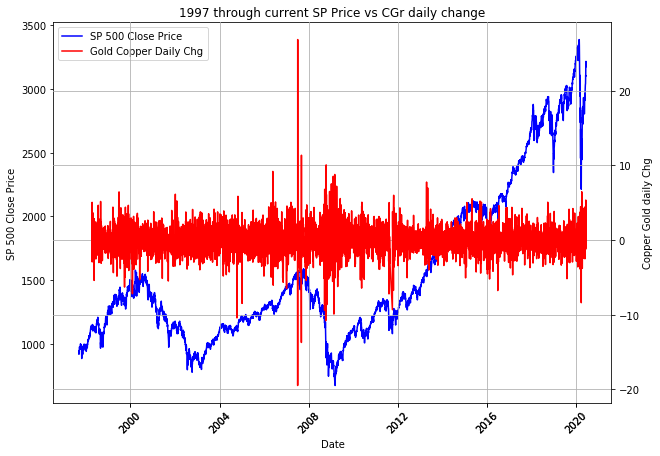

In [28]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP_dates['Date'], SP_dates['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(copp_gold_dates_df['Date'],copp_gold_dates_df['Gold-Copp Dly Ret'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg"), loc=0)
plt.title("1997 through current SP Price vs CGr daily change")
plt.xlabel("Date")
plt.grid(alpha=1)
fig1.savefig("1997 through current SP Price vs CGr daily change")
plt.show()

In [29]:
copp_gold_dates_df['MA'] = copp_gold_dates_df.rolling(55).mean()['Gold-Copp Dly Ret']
copp_gold_dates_df.tail(5)

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727
8682,2020-06-10,2.28,1720.7,2.6565,0.001544,0.275091


In [30]:
copp_gold_dates_df['rolling_std'] = copp_gold_dates_df.rolling(55).std()['Gold-Copp Dly Ret']
copp_gold_dates_df.tail(5)

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
8678,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
8679,2020-06-05,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
8680,2020-06-08,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
8681,2020-06-09,0.32,1721.9,2.5990,0.001509,0.080727,2.384922
8682,2020-06-10,2.28,1720.7,2.6565,0.001544,0.275091,2.098548


In [31]:
SP_filter_df = SP_dates.loc[(SP_dates["Date"] >= "2018-06-11") & 
                                   (SP_dates["Date"] <= "2020-06-10")]
SP_filter_df.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SP_MA
5286,2018-06-11,0.15,2776.75,2794.25,2774.00,2786.00,4.25,2786.75,1546322.0,1142120.0,0.096182
5287,2018-06-12,0.05,2785.00,2794.00,2782.25,2792.50,1.50,2788.25,1486877.0,1809743.0,0.128727
5288,2018-06-13,-0.33,2792.00,2796.00,2778.50,2779.50,9.25,2779.00,1371929.0,2283691.0,0.079455
5289,2018-06-14,0.34,2777.75,2794.00,2772.25,2788.25,9.50,2788.50,1251575.0,2499069.0,0.115818
5290,2018-06-15,-0.14,2787.00,2788.50,2765.50,2781.50,4.00,2784.50,1475397.0,2602004.0,0.118909


In [32]:
CGr_filter_df = copp_gold_dates_df.loc[(copp_gold_dates_df["Date"] >= "1998-06-11") & 
                                   (copp_gold_dates_df["Date"] <= "2020-06-10")]
CGr_filter_df.head()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
3209,1998-06-11,-0.01,288.7,0.7635,0.002645,NaN,NaN
3210,1998-06-12,-0.76,287.3,0.7540,0.002624,NaN,NaN
3211,1998-06-15,-2.55,286.6,0.7330,0.002558,NaN,NaN
3212,1998-06-16,-0.84,290.0,0.7355,0.002536,NaN,NaN
3213,1998-06-17,0.14,294.9,0.7490,0.002540,NaN,NaN


NameError: name 'line3' is not defined

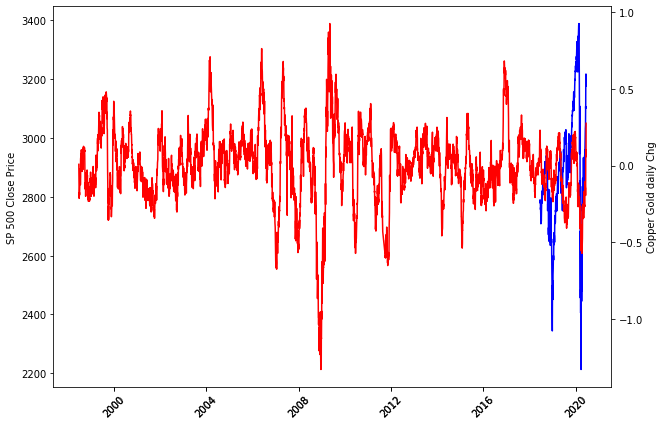

In [33]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP_filter_df['Date'], SP_filter_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax1.legend((line1+line2+line3), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("Jan 2017 to Pres - SP 500 Close Price vs.Copper Gold Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

C:\Users\bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


NameError: name 'line3' is not defined

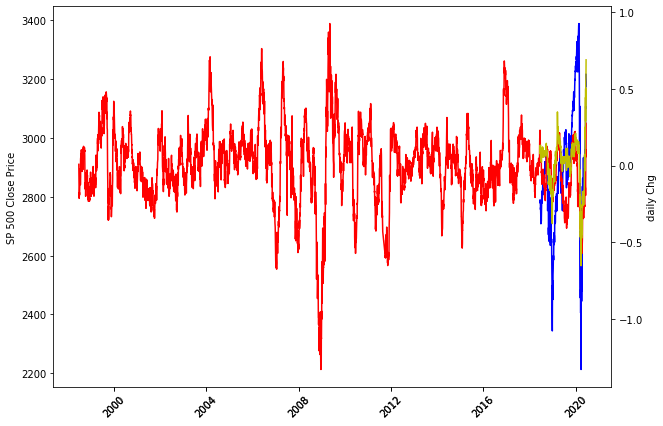

In [34]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(SP_filter_df['Date'], SP_filter_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2= ax2.plot(CGr_filter_df['Date'],CGr_filter_df['MA'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line4= ax2.plot(SP_filter_df['Date'],SP_filter_df['SP_MA'], "y-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("daily Chg")

ax1.legend((line1+line2+line3+line4), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std", "SP500 daily % MA"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("SP500 Cgr Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")
plt.show()

In [35]:
# Rolling Correlation
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = forcorr_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(forcorr_df['Gold-Copp Dly Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
# print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )
# correl.tail()
lower_correl.tail()


5511    0.059577
5512    0.062634
5513    0.066235
5514    0.071039
5515    0.068468
dtype: float64

In [36]:
forcorr_df.tail()

,Date,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,SP_Daily_Pct_Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SP_MA
5511,2020-06-04,-1.23,1727.4,2.4895,0.001441,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,57382.0,0.435818
5512,2020-06-05,5.36,1683.0,2.5555,0.001518,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,66325.0,0.542364
5513,2020-06-08,-0.91,1705.1,2.5655,0.001505,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,75367.0,0.574909
5514,2020-06-09,0.32,1721.9,2.5990,0.001509,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,127169.0,0.638909
5515,2020-06-10,2.28,1720.7,2.6565,0.001544,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,151588.0,0.688000


In [37]:
SP_GCR_corr_df = pd.merge(SP500_df, copp_gold_df, on=["Date"])
SP_GCR_corr = st.pearsonr(SP_GCR_corr_df["SP_Daily_Pct_Return"],SP_GCR_corr_df["Gold-Copp Dly Ret"])[0]
print(SP_GCR_corr)

0.25690739418896813


In [38]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = SP_GCR_corr_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(SP_GCR_corr_df['Gold-Copp Dly Ret'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5661    0.133223
5662    0.132673
5663    0.131858
5664    0.132827
5665    0.134341
Length: 5666, dtype: float64


In [39]:
summary_df = pd.DataFrame({'Date': SP_GCR_corr_df['Date'],
                                      'dly chg correlation': correl,
                                      'dly chg corr mean': correl_mean,
                                      'Std daily chg correl':std_correl,
                                      'upper_correl': upper_correl,
                                      'lower_correl':lower_correl})

summary_df = summary_df.loc[(SP_dates["Date"] >= "1998-04-15") & 
                                   (SP_dates["Date"] <= "2020-06-10")]


summary_df.head(150)

,Date,dly chg correlation,dly chg corr mean,Std daily chg correl,upper_correl,lower_correl
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979
...,...,...,...,...,...,...
297,1998-11-12,0.382866,0.363025,0.051947,0.466919,0.259132
298,1998-11-13,0.494902,0.368822,0.048365,0.465551,0.272093
299,1998-11-16,0.495549,0.374434,0.044627,0.463687,0.285181
300,1998-11-17,0.519461,0.380043,0.043061,0.466165,0.293921


In [40]:
def my_signal(row):
    if row['dly chg correlation']> row ['upper_correl']:
        return row['dly chg correlation'] - row['upper_correl']
    elif row['dly chg correlation'] < row['lower_correl']:
        return row['dly chg correlation'] - row['lower_correl']
    else:
        return 0
    
summary_df['signal'] = summary_df.apply(my_signal, axis=1)
summary_df

    


,Date,dly chg correlation,dly chg corr mean,Std daily chg correl,upper_correl,lower_correl,signal
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572,0.000000
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055,0.000000
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794,0.000000
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739,0.000000
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979,0.000000
...,...,...,...,...,...,...,...
5661,2020-06-10,0.009343,0.133223,0.032378,0.197978,0.068468,-0.059125
5662,2020-06-11,0.183151,0.132673,0.031227,0.195127,0.070219,0.000000
5663,2020-06-12,0.178245,0.131858,0.029353,0.190563,0.073152,0.000000
5664,2020-06-15,0.242373,0.132827,0.032034,0.196896,0.068758,0.045477


In [41]:
summary_df

,Date,dly chg correlation,dly chg corr mean,Std daily chg correl,upper_correl,lower_correl,signal
152,1998-04-20,0.011009,-0.033064,0.048754,0.064444,-0.130572,0.000000
153,1998-04-21,-0.006357,-0.032348,0.048854,0.065359,-0.130055,0.000000
154,1998-04-22,0.016310,-0.031263,0.049265,0.067268,-0.129794,0.000000
155,1998-04-23,0.030037,-0.029908,0.049915,0.069923,-0.129739,0.000000
156,1998-04-24,0.045383,-0.028229,0.050875,0.073521,-0.129979,0.000000
...,...,...,...,...,...,...,...
5661,2020-06-10,0.009343,0.133223,0.032378,0.197978,0.068468,-0.059125
5662,2020-06-11,0.183151,0.132673,0.031227,0.195127,0.070219,0.000000
5663,2020-06-12,0.178245,0.131858,0.029353,0.190563,0.073152,0.000000
5664,2020-06-15,0.242373,0.132827,0.032034,0.196896,0.068758,0.045477


In [42]:
# print(summary_df.isnull().sum())
# final_df.dropna(inplace=True)
# print(final_df.isnull().sum())
# final_df

In [214]:
summary2_df = pd.merge(SP_filter_df, summary_df, on=["Date"])
summary3_df = pd.merge(summary2_df, CGr_filter_df, on=["Date"])
summary3_df.tail()

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,...,Std daily chg correl,upper_correl,lower_correl,signal,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
499,2020-06-04,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,57382.0,...,0.042730,0.230498,0.059577,0.000000,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
500,2020-06-05,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,66325.0,...,0.040072,0.222922,0.062634,0.000000,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
501,2020-06-08,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,75367.0,...,0.037190,0.214997,0.066235,0.000000,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
502,2020-06-09,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,127169.0,...,0.033527,0.205148,0.071039,0.000000,0.32,1721.9,2.5990,0.001509,0.080727,2.384922
503,2020-06-10,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,151588.0,...,0.032378,0.197978,0.068468,-0.059125,2.28,1720.7,2.6565,0.001544,0.275091,2.098548


NameError: name 'line3' is not defined

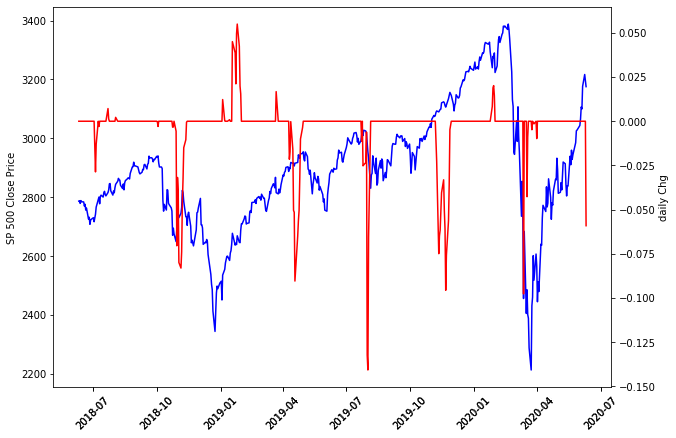

In [215]:
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(summary3_df['Date'], summary3_df['Settle'], "b-")
plt.xticks(rotation = 45)
plt.ylabel("SP 500 Close Price")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line2= ax2.plot(summary3_df['Date'],summary3_df['MA'], "r-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line3= ax2.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['rolling_std'], "g-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("Copper Gold daily Chg")

# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line4= ax2.plot(summary3_df['Date'],summary3_df['SP_MA'], "y-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")



# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line5= ax2.plot(summary3_df['Date'],summary3_df['upper_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")


# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line6= ax2.plot(summary3_df['Date'],summary3_df['lower_correl'], "m-")
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# plt.xticks(rotation=45)
# plt.ylabel("daily Chg")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line7= ax2.plot(summary3_df['Date'],summary3_df['signal'], "r-")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(rotation=45)
plt.ylabel("daily Chg")


ax1.legend((line1+line2+line3+line4+line5+line6), ("SP 500 Close Price", "Gold Copper Daily Chg MA", "GoldCopp Rolling Std", "SP500 daily % MA"), loc=0)
# ax1.legend((line1+line2), ("SP 500 Close Price", "Gold Copper Daily Chg MA"), loc=0)
plt.title("SP500 Cgr Metrics")
plt.xlabel("Date")
plt.grid(alpha=1)
# fig1.savefig("Jan 2017 to Pres. vs Gold Copper daily ret metrics")



plt.show()

In [216]:
summary3_df.to_csv('jun18tojun20.csv', encoding='utf-8')

In [39]:
SP_GCR_Summary_df = pd.dataframe()
SP_GCR_Summary_df = pd.DataFrame([{"dly chg correlation": correl,
                            "dly chg corr mean": correl_mean,
                            "dly chg Std":std_correl,
                            "upper std": upper_correl
                            "lower std": lower_correl,}])

SP_GCR_Summary_df["# dly chg correlation"] = summary_df["# of Transactions"]
summary_df["Total Unique Items"] = summary_df["Total Unique Items"]
summary_df["Avg. Price"] = summary_df["Avg. Price"]
summary_df["Total Revenue"] = summary_df["Total Revenue"]


SyntaxError: invalid syntax (<ipython-input-39-33c1bb89de68>, line 6)

In [41]:
SP_GCR_corr_df['SP_Daily_Pct_Return'] = SP_GCR_corr_df.rolling(55).corr()['Gold-Copp Dly Ret']
SP_GCR_corr_df.tail(5)

TypeError: cannot perform __rmul__ with this index type: DatetimeIndex

In [42]:
print(upper_correl)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5659    0.214997
5660    0.205148
5661    0.197978
5662    0.195127
5663    0.190563
Length: 5664, dtype: float64


In [43]:
lower_correl.tail(20)

5644   -0.001486
5645   -0.001578
5646   -0.001472
5647    0.000796
5648    0.003508
5649    0.007838
5650    0.013534
5651    0.020725
5652    0.032622
5653    0.043065
5654    0.043071
5655    0.050417
5656    0.058033
5657    0.059577
5658    0.062634
5659    0.066235
5660    0.071039
5661    0.068468
5662    0.070219
5663    0.073152
dtype: float64

In [44]:
SP_GCR_corr_df.head(5)

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0,0.05,324.1,0.9655,0.002979
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0,0.31,324.1,0.9685,0.002988
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0,-3.58,326.6,0.9410,0.002881
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0,0.44,326.2,0.9440,0.002894
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0,0.67,324.7,0.9460,0.002913


In [45]:
summary3_df.tail()

,Date,SP Daily Pct Return,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,...,Std daily chg correl,upper_correl,lower_correl,signal,Gold-Copp Dly Ret,Gold Price,Copper Price,GoldCopperRatio,MA,rolling_std
5077,2020-06-04,-0.22,3106.75,3115.75,3077.00,3103.0,6.75,3099.75,31864.0,57382.0,...,0.042730,0.230498,0.059577,0.000000,-1.23,1727.4,2.4895,0.001441,-0.066545,2.343876
5078,2020-06-05,2.48,3102.25,3199.75,3096.00,3175.0,76.75,3176.50,56532.0,66325.0,...,0.040072,0.222922,0.062634,0.000000,5.36,1683.0,2.5555,0.001518,0.102545,2.394182
5079,2020-06-08,1.27,3181.50,3220.50,3173.00,3215.5,40.25,3216.75,89946.0,75367.0,...,0.037190,0.214997,0.066235,0.000000,-0.91,1705.1,2.5655,0.001505,0.056909,2.389027
5080,2020-06-09,-0.69,3216.00,3220.00,3179.00,3194.5,22.25,3194.50,92923.0,127169.0,...,0.033527,0.205148,0.071039,0.000000,0.32,1721.9,2.5990,0.001509,0.080727,2.384922
5081,2020-06-10,-0.59,3194.25,3216.75,3168.75,3173.5,19.00,3175.50,160381.0,151588.0,...,0.032378,0.197978,0.068468,-0.059125,2.28,1720.7,2.6565,0.001544,0.275091,2.098548


In [246]:
csv_file = os.path.join("CGr_model_returns.csv")
CGr_returns_df = pd.read_csv(csv_file)
CGr_returns_df["period"] = pd.to_datetime(CGr_returns_df["period"])
# CGr_returns_df['Capital'] = CGr_returns_df['Capital'].astype(float)
CGr_returns_df.drop(CGr_returns_df.columns[[5]], axis=1, inplace=True)
CGr_returns_df.dropna(inplace=True)
CGr_returns_df.head(12)

,period,CGr + Model ret,Ltd return,CGr+ PL,Capital
0,1998-06-15,0.00,0.00,0.00,100000.00
1,2000-06-15,0.18,0.18,18406.00,118406.00
2,2002-06-15,0.30,0.54,35985.44,154391.44
3,2004-06-15,0.18,0.81,27027.68,181419.12
4,2006-06-15,0.07,0.94,12318.65,193737.77
5,2008-06-15,0.08,1.09,15455.55,209193.32
6,2010-06-15,-0.23,0.60,-49026.20,160167.12
7,2012-06-15,0.19,0.90,29738.38,189905.50
8,2014-06-15,0.15,1.18,27607.13,217512.63
9,2016-06-15,0.19,1.59,41405.12,258917.76


In [247]:
plt.bar(CGr_returns_df['period'],CGr_returns_df['Capital'])
plt.title("CGr Model Capital Growth")
plt.xticks(rotation = 90)
plt.show()


KeyError: 'Capital'